# Data Analysis
5/16/2022  
Lei G Renmin Univ. of China

In [3]:
# install required packages for the project
#%pip install missingno
#%pip install pandas-profiling[notebook]
#%pip install typing-extensions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation
import missingno as msno
import datetime

%matplotlib inline

In [5]:
df = pd.read_csv('car_prices.csv',on_bad_lines='skip')


In [7]:
df.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [24]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


In [23]:
df.notnull().mean()

year            1.000000
make            0.981566
model           0.981391
trim            0.980940
body            0.976387
transmission    0.883050
vin             1.000000
state           1.000000
condition       0.978894
odometer        0.999832
color           0.998660
interior        0.998660
seller          1.000000
mmr             1.000000
sellingprice    1.000000
saledate        1.000000
saledate_dt     1.000000
dtype: float64

<AxesSubplot:>

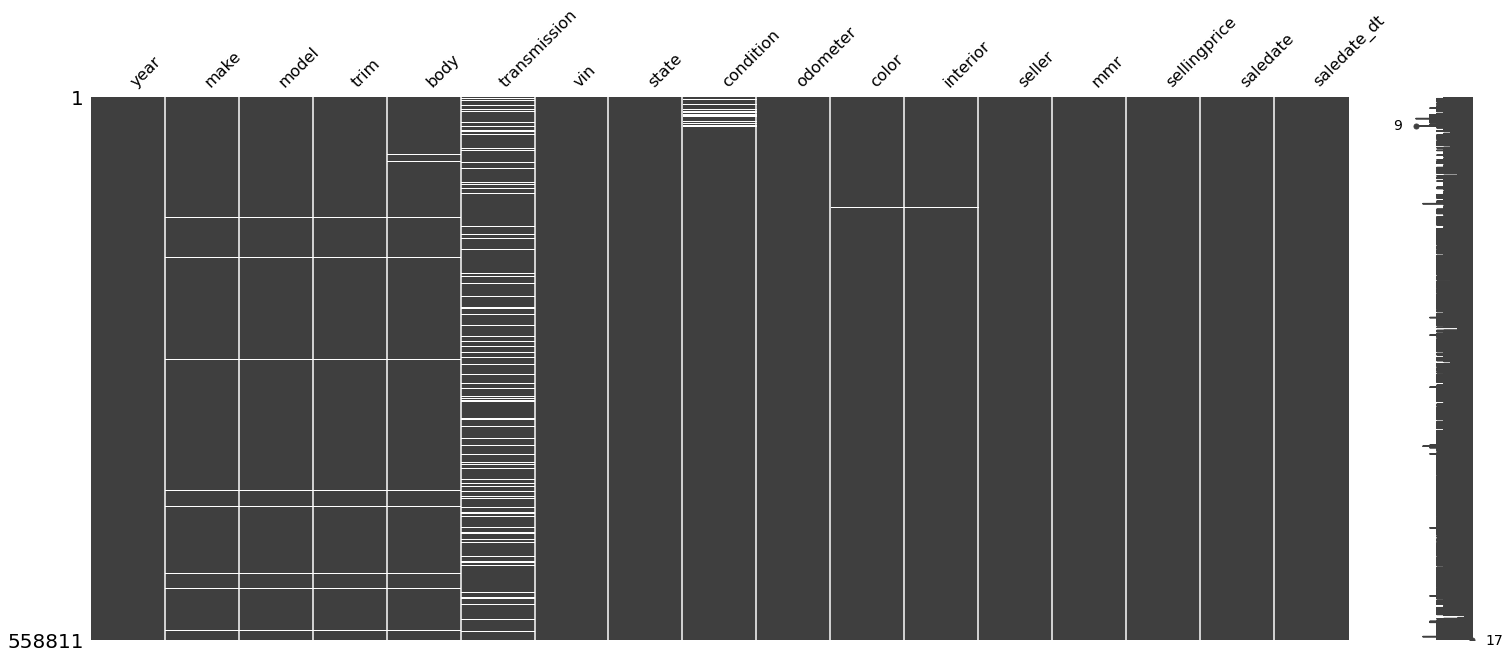

In [21]:
msno.matrix(df)

In [8]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [18]:
df['saledate_dt']=pd.to_datetime(df['saledate'],infer_datetime_format=True)

In [19]:
datetime.datetime.now()

datetime.datetime(2022, 5, 16, 11, 39, 39, 319162)

In [20]:
df['saledate_dt']

0         2014-12-16 12:30:00+08:00
1         2014-12-16 12:30:00+08:00
2         2015-01-15 04:30:00+08:00
3         2015-01-29 04:30:00+08:00
4         2014-12-18 12:30:00+08:00
                    ...            
558806    2015-07-09 07:00:00+07:00
558807    2015-07-08 09:30:00+07:00
558808    2015-07-08 09:30:00+07:00
558809    2015-07-09 06:45:00+07:00
558810    2015-05-28 05:30:00+07:00
Name: saledate_dt, Length: 558811, dtype: object

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'mmr'}>],
       [<AxesSubplot:title={'center':'sellingprice'}>, <AxesSubplot:>]],
      dtype=object)

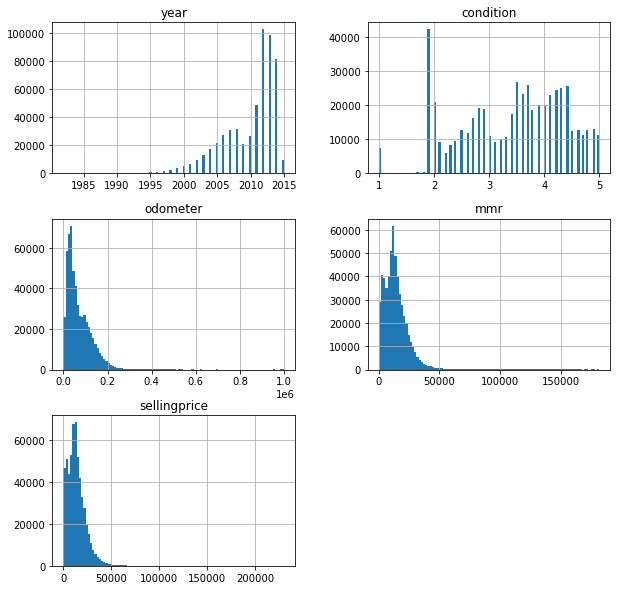

In [40]:
df.hist(bins=100,figsize=(10,10),layout=(3,2))

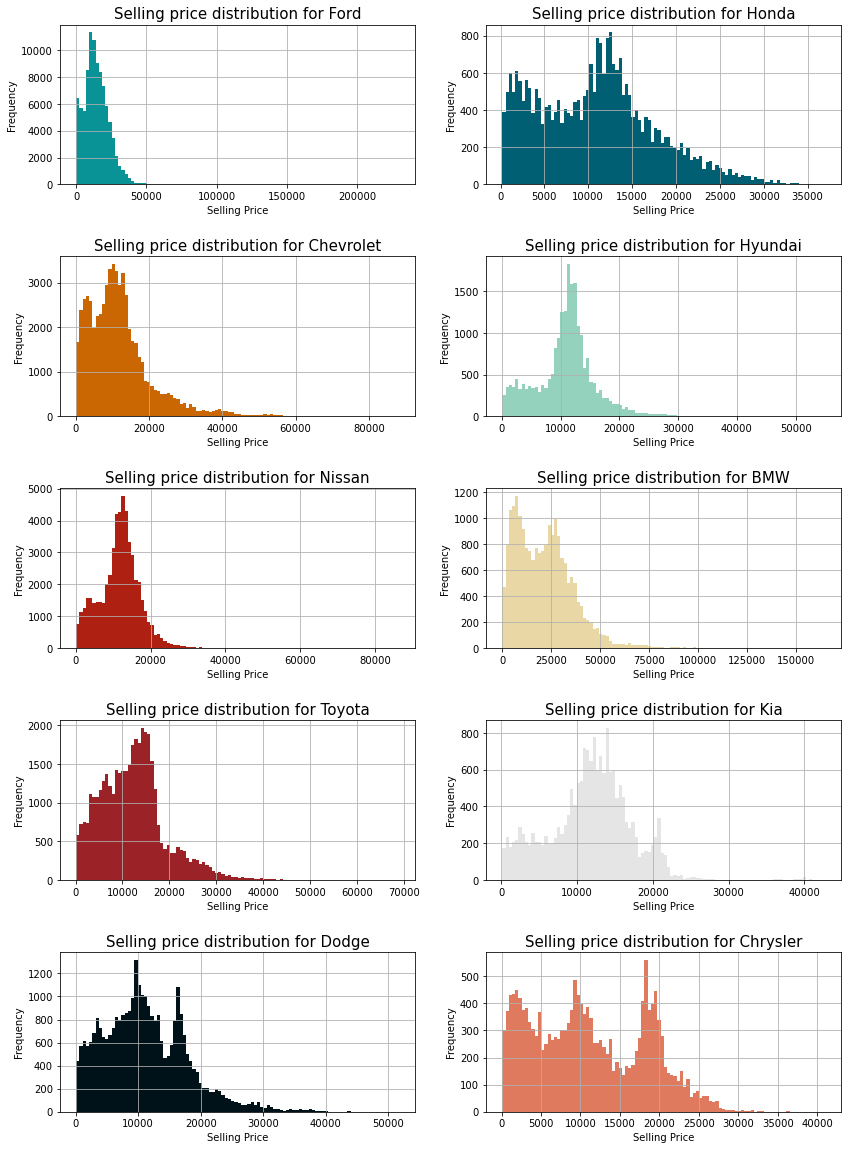

In [35]:
#Distribution of the 
top_make=df['make'].value_counts()[:10].index
fig,ax=plt.subplots(5,2,figsize=(14,20))
color_list=['#0a9396','#ca6702',
            '#ae2012','#9b2226','#001219',
            '#005f73','#94d2bd','#e9d8a6','#e5e5e5','#e07a5f'] #b
i=0
for t in top_make:
    df.loc[df['make']==t,'sellingprice'].hist(
        ax=ax[i%5][i//5],bins=100,color=color_list[i%len(color_list)])
    ax[i%5][i//5].set_xlabel('Selling Price',fontsize=10)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=10)
    ax[i%5][i//5].set_title(f'Selling price distribution for {t}',fontsize=15)
    plt.subplots_adjust(hspace=0.45)
    i+=1

### references
1. https://www.kaggle.com/code/abhi7847/exploratory-data-analysis-eda-for-beginners
2. https://www.kaggle.com/code/gsdeepakkumar/car-auctions-what-influences-the-selling-price
3. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/